 # Data Analysis Project: Air Quality and Meteorological Conditions
 - **Name:** Daru Okta Buana
 - **Email:** daruokta@gmail.com
 - **Dicoding ID:** buana_daru_okta

 ## Defining Business Questions

  - **Question 1:** What are the primary factors influencing PM2.5 levels at each monitoring station?
  - **Question 2:** How do seasonal and geographical patterns of air quality vary across different monitoring stations?
  - **Question 3:** What is the relationship between meteorological conditions (such as temperature, wind speed, rainfall) and levels of air pollutants (such as SO2, NO2, CO, O3)?
  - **Question 4:** Which monitoring stations consistently report the poorest air quality, and what recommendations can be made to improve it?

 ## Import All Necessary Packages/Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

 ## Data Wrangling

### Gathering Data

In [110]:
# Define the path to the data directory relative to the notebook
data_path = './data/PRSA_Data_20130301-20170228/'

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(data_path, '*.csv'))

# Initialize an empty list to hold dataframes
df_list = []

# Loop through the list of files and read them into dataframes
for file in csv_files:
    df = pd.read_csv(file)
    # Extract station name from the filename
    station_name = os.path.basename(file).split('_')[2]
    df['station'] = station_name
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(df_list, ignore_index=True)

# Display the first few rows
data.head()



No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

 **Insight:**
  - Data has been successfully loaded from multiple CSV files.
  - Each record includes air quality measurements and meteorological conditions from various stations.

 ### Assessing Data

In [111]:
# Check the shape of the data
print(f"Data Shape: {data.shape}")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
print("Data Types:\n", data.dtypes)

Data Shape: (420768, 18)
Missing Values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


 **Insight:**
  - Understanding the size of the dataset and the presence of missing values is crucial for data cleaning.
  - Identifying data types to help in determining the appropriate preprocessing steps.

 ### Cleaning Data

 #### Handle missing values using imputation

In [112]:
# Define numerical and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Impute numerical columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute categorical columns with the most frequent value (mode)
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

# Convert date and time columns to a single datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set datetime as the index
data.set_index('datetime', inplace=True)
data.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                   
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2013-03-01 00:00:00  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
2013-03-01 01:00:00  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2013-03-01 02:00:00  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
2013-03-01 03:00:00  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
2013-03-01 04:00:00  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

                          station  
datetime                           
2013-03-01 00:00:00  Aotizhongxin  
2013-03-01 01:00:00  Aotizhongxin  
2013-03-01 02:00:00  Aotizhongxin  
2013-03-01 03:00:00  Aotizhongxin  
2013-03-01 04:00:00  Aotizhongxin

In [113]:
# data.to_csv('dashboard/data_baru.csv')

# print(data.head())

 **Insight:**
  - Missing values have been addressed through imputation, retaining more data for analysis.
  - Date and time information has been consolidated into a single datetime index for easier time-based analysis.

 #### Encoding Categorical Variables

In [114]:
# Handling Wind Direction ('wd') by mapping to degrees
wind_directions = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
data['wd_degree'] = data['wd'].map(wind_directions)

# Handling 'station' by encoding as categorical codes
data['station_code'] = data['station'].astype('category').cat.codes

# Verify encoding
data[['wd', 'wd_degree', 'station', 'station_code']].head()

wd  wd_degree       station  station_code
datetime                                                       
2013-03-01 00:00:00  NNW      337.5  Aotizhongxin             0
2013-03-01 01:00:00    N        0.0  Aotizhongxin             0
2013-03-01 02:00:00  NNW      337.5  Aotizhongxin             0
2013-03-01 03:00:00   NW      315.0  Aotizhongxin             0
2013-03-01 04:00:00    N        0.0  Aotizhongxin             0

  **Insight:**
  - Wind directions have been converted to numerical degrees, allowing for their inclusion in numerical analyses.
  - Stations have been encoded into numerical codes, facilitating their use in correlation and modeling.

 ## Exploratory Data Analysis (EDA)

 ### Summary Statistics

In [115]:
# Display summary statistics
data.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      79.978679      91.066422      21.417257   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      21.000000      36.000000       3.000000   
50%        11.500000      57.000000      84.000000       8.000000   
75%        17.250000     109.000000     144.000000      19.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        34.618463    1131.283304      55.760484      11.430729   
min         1.026500     100.000000       0.214200     -19.900000   
25%        24.000000     500.000000      12.000000       3.100000   
50%        45.000000     900.000000      47.000000      14.500000   
75%        70.000000    1500.000000      80.000000      23.200000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1010.746982       2.490822       0.064476       1.729711   
std        10.469162      13.787240       0.820624       1.245914   
min       982.400000     -43.400000       0.000000       0.000000   
25%      1002.300000      -8.900000       0.000000       0.900000   
50%      1010.400000       3.000000       0.000000       1.400000   
75%      1019.000000      15.100000       0.000000       2.200000   
max      1042.800000      29.100000      72.500000      13.200000   

           wd_degree   station_code  
count  420768.000000  420768.000000  
mean      156.977776       5.500000  
std       108.655812       3.452057  
min         0.000000       0.000000  
25%        67.500000       2.750000  
50%       135.000000       5.500000  
75%       247.500000       8.250000  
max       337.500000      11.000000

 **Insight:**
  - Provides an overview of the central tendency, dispersion, and shape of the dataset’s distribution.
  - Identifies potential outliers and the range of values for each feature.

 ### Correlation Analysis

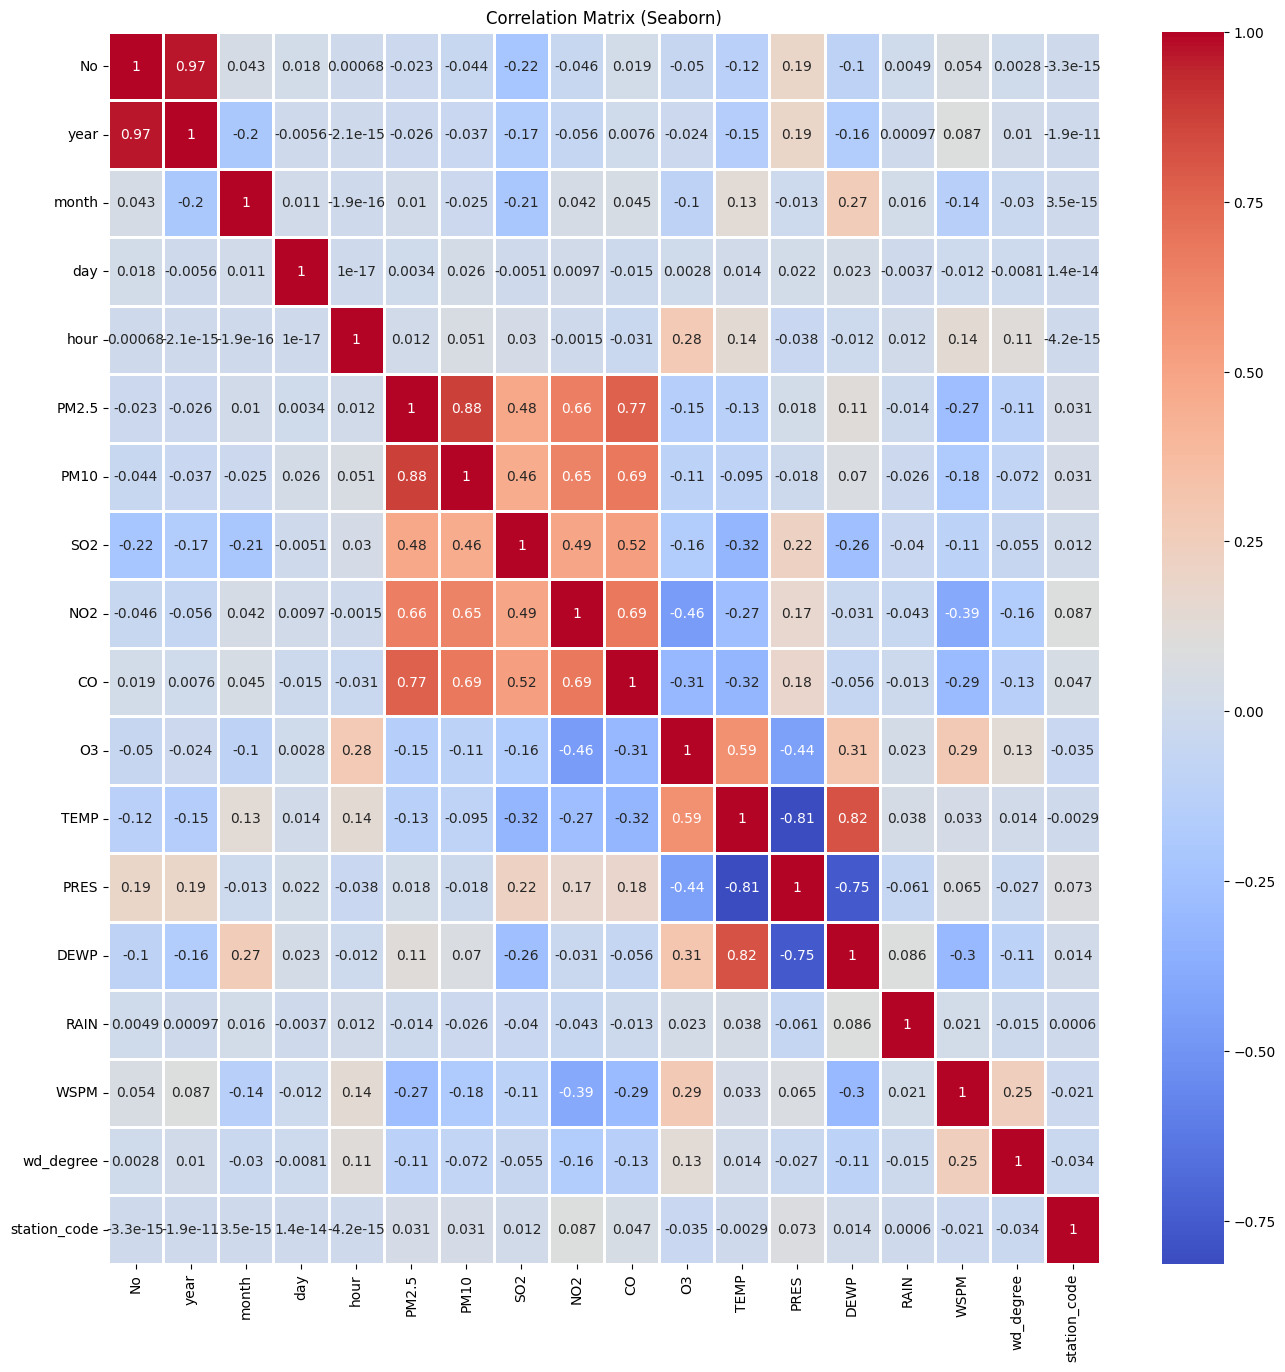

In [116]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix (Seaborn)')
plt.show()

  **Insight:**
  - The correlation matrix provides a visual representation of the relationships between different variables.
  - Identifies which factors are strongly or weakly associated with PM2.5 levels.

 ### Time Series Trends

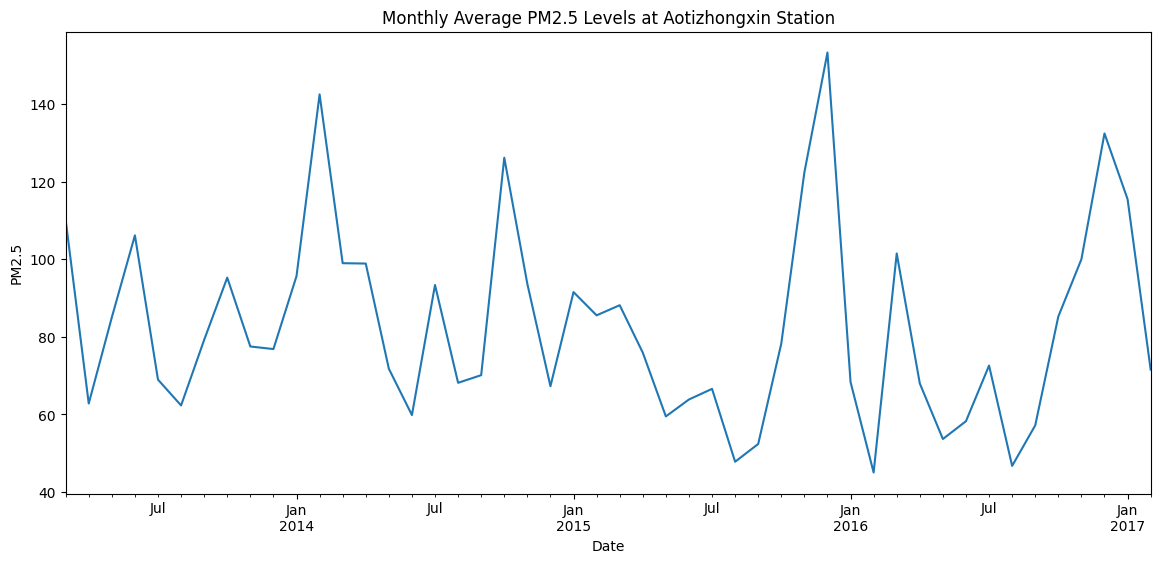

In [117]:
# Plot PM2.5 over time for a specific station
station_to_plot = 'Aotizhongxin'  
pm25_station = data[data['station'] == station_to_plot]['PM2.5']

plt.figure(figsize=(14,6))
pm25_station.resample('ME').mean().plot()
plt.title(f'Monthly Average PM2.5 Levels at {station_to_plot} Station')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

  **Insight:**
  - Time series plots reveal trends and seasonal patterns in PM2.5 levels over the study period.
  - Helps in identifying any long-term improvements or deteriorations in air quality.

 ## Visualization & Explanatory Analysis

 ### Question 1: What are the primary factors influencing PM2.5 levels at each monitoring station?

Top 5 features correlated with PM2.5: ['PM10', 'CO', 'NO2', 'SO2', 'WSPM']


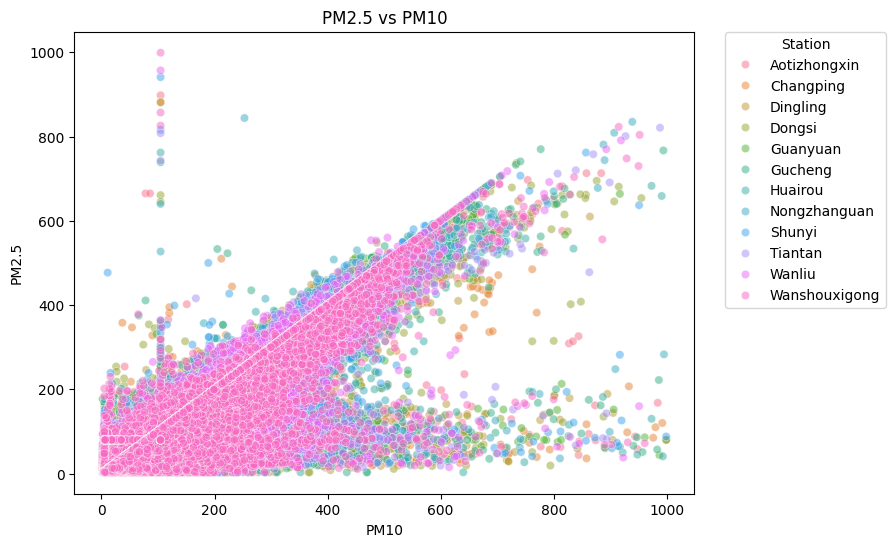

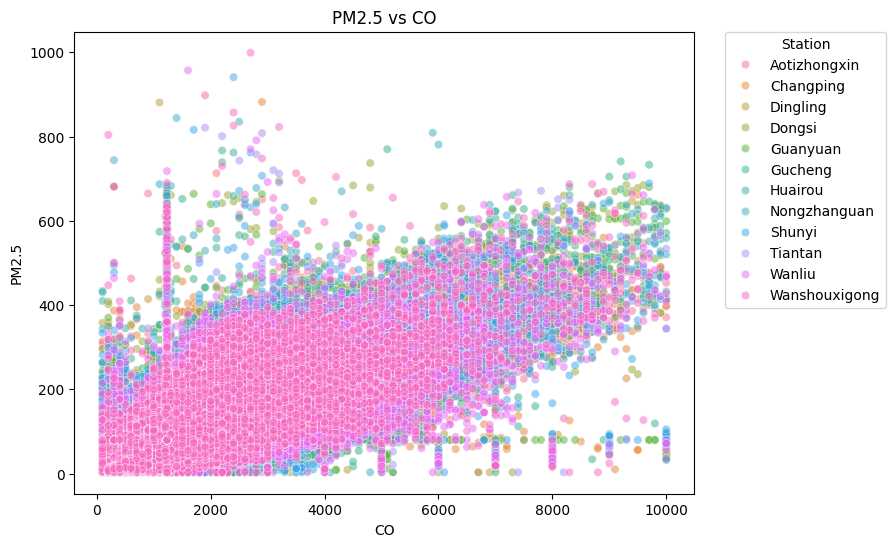

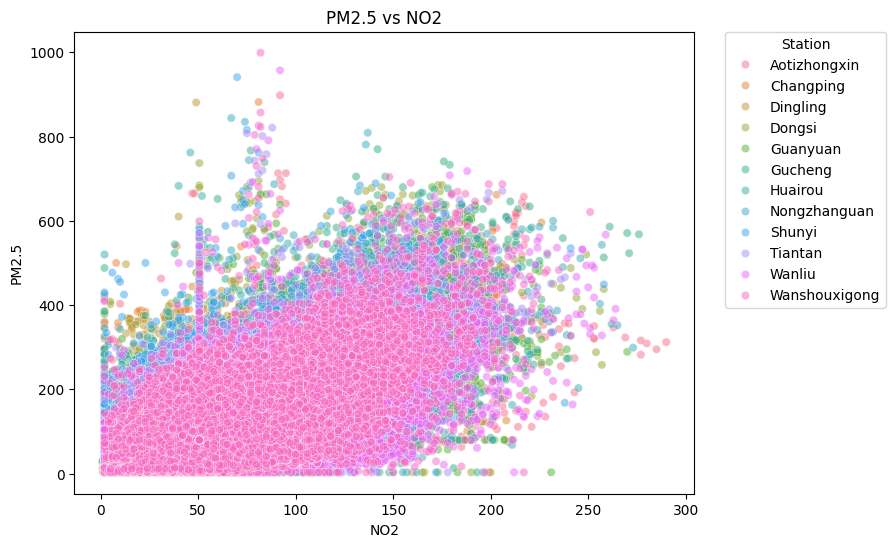

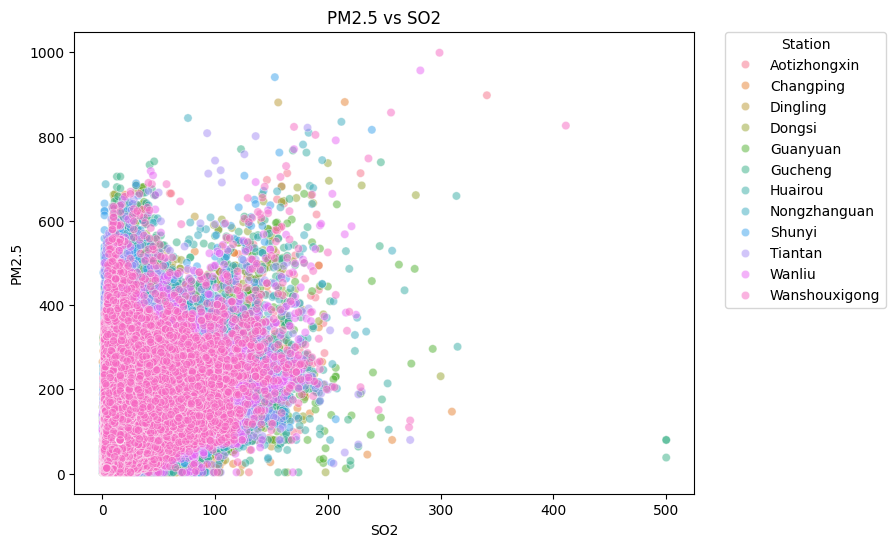

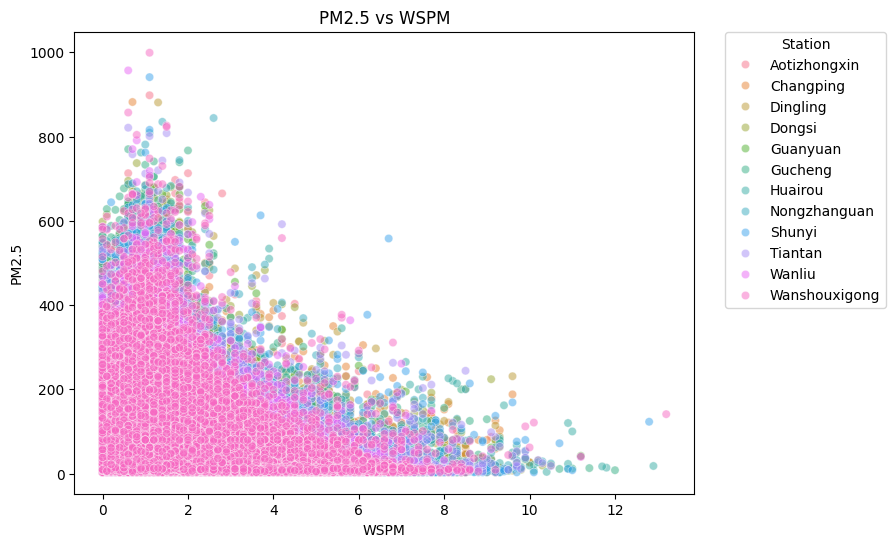

In [118]:
# Identify top 5 correlated features with PM2.5
top_corr = corr['PM2.5'].abs().sort_values(ascending=False).iloc[1:6].index.tolist()
print(f"Top 5 features correlated with PM2.5: {top_corr}")

# Plot scatter plots for top correlated features
for feature in top_corr:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data[feature], y=data['PM2.5'], hue=data['station'], alpha=0.5)
    plt.title(f'PM2.5 vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('PM2.5')
    plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

  **Insight:**
  - The scatter plots highlight the relationships between PM2.5 and the top correlated factors.
  - Visual differentiation by station can reveal station-specific patterns.

 ### Question 2: How do seasonal and geographical patterns of air quality vary across different monitoring stations?

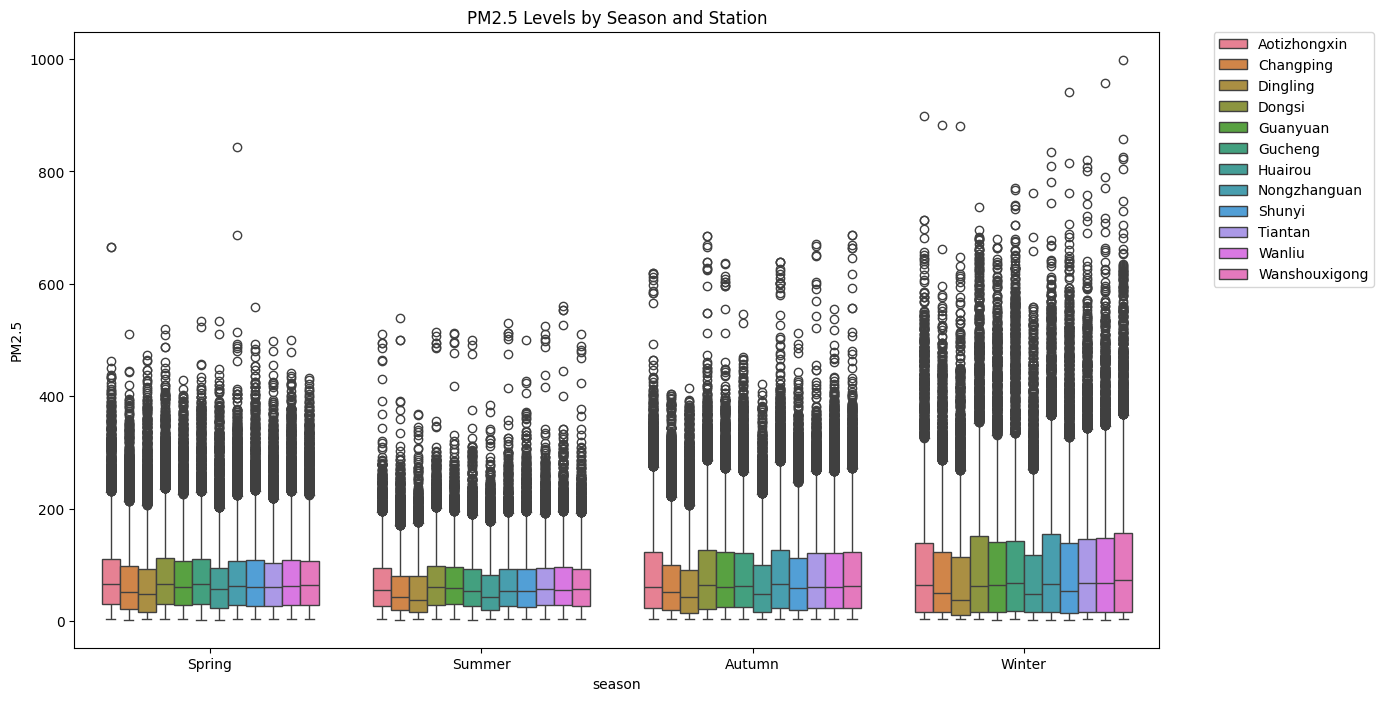

In [119]:
# Extract month and season from datetime index
data['month'] = data.index.month
data['season'] = data['month'].apply(lambda x: 
                                    'Winter' if x in [12, 1, 2] else 
                                    'Spring' if x in [3,4,5] else 
                                    'Summer' if x in [6,7,8] else 
                                    'Autumn')

# Plot PM2.5 levels by season for each station
plt.figure(figsize=(14,8))
sns.boxplot(x='season', y='PM2.5', hue='station', data=data)
plt.title('PM2.5 Levels by Season and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

  **Insight:**
  - Box plots reveal the distribution of PM2.5 levels across different seasons and stations.
  - Helps in identifying seasonal trends and station-specific variations in air quality.

 ### Question 3: What is the relationship between meteorological conditions (such as temperature, wind speed, rainfall) and levels of air pollutants (such as SO2, NO2, CO, O3)?

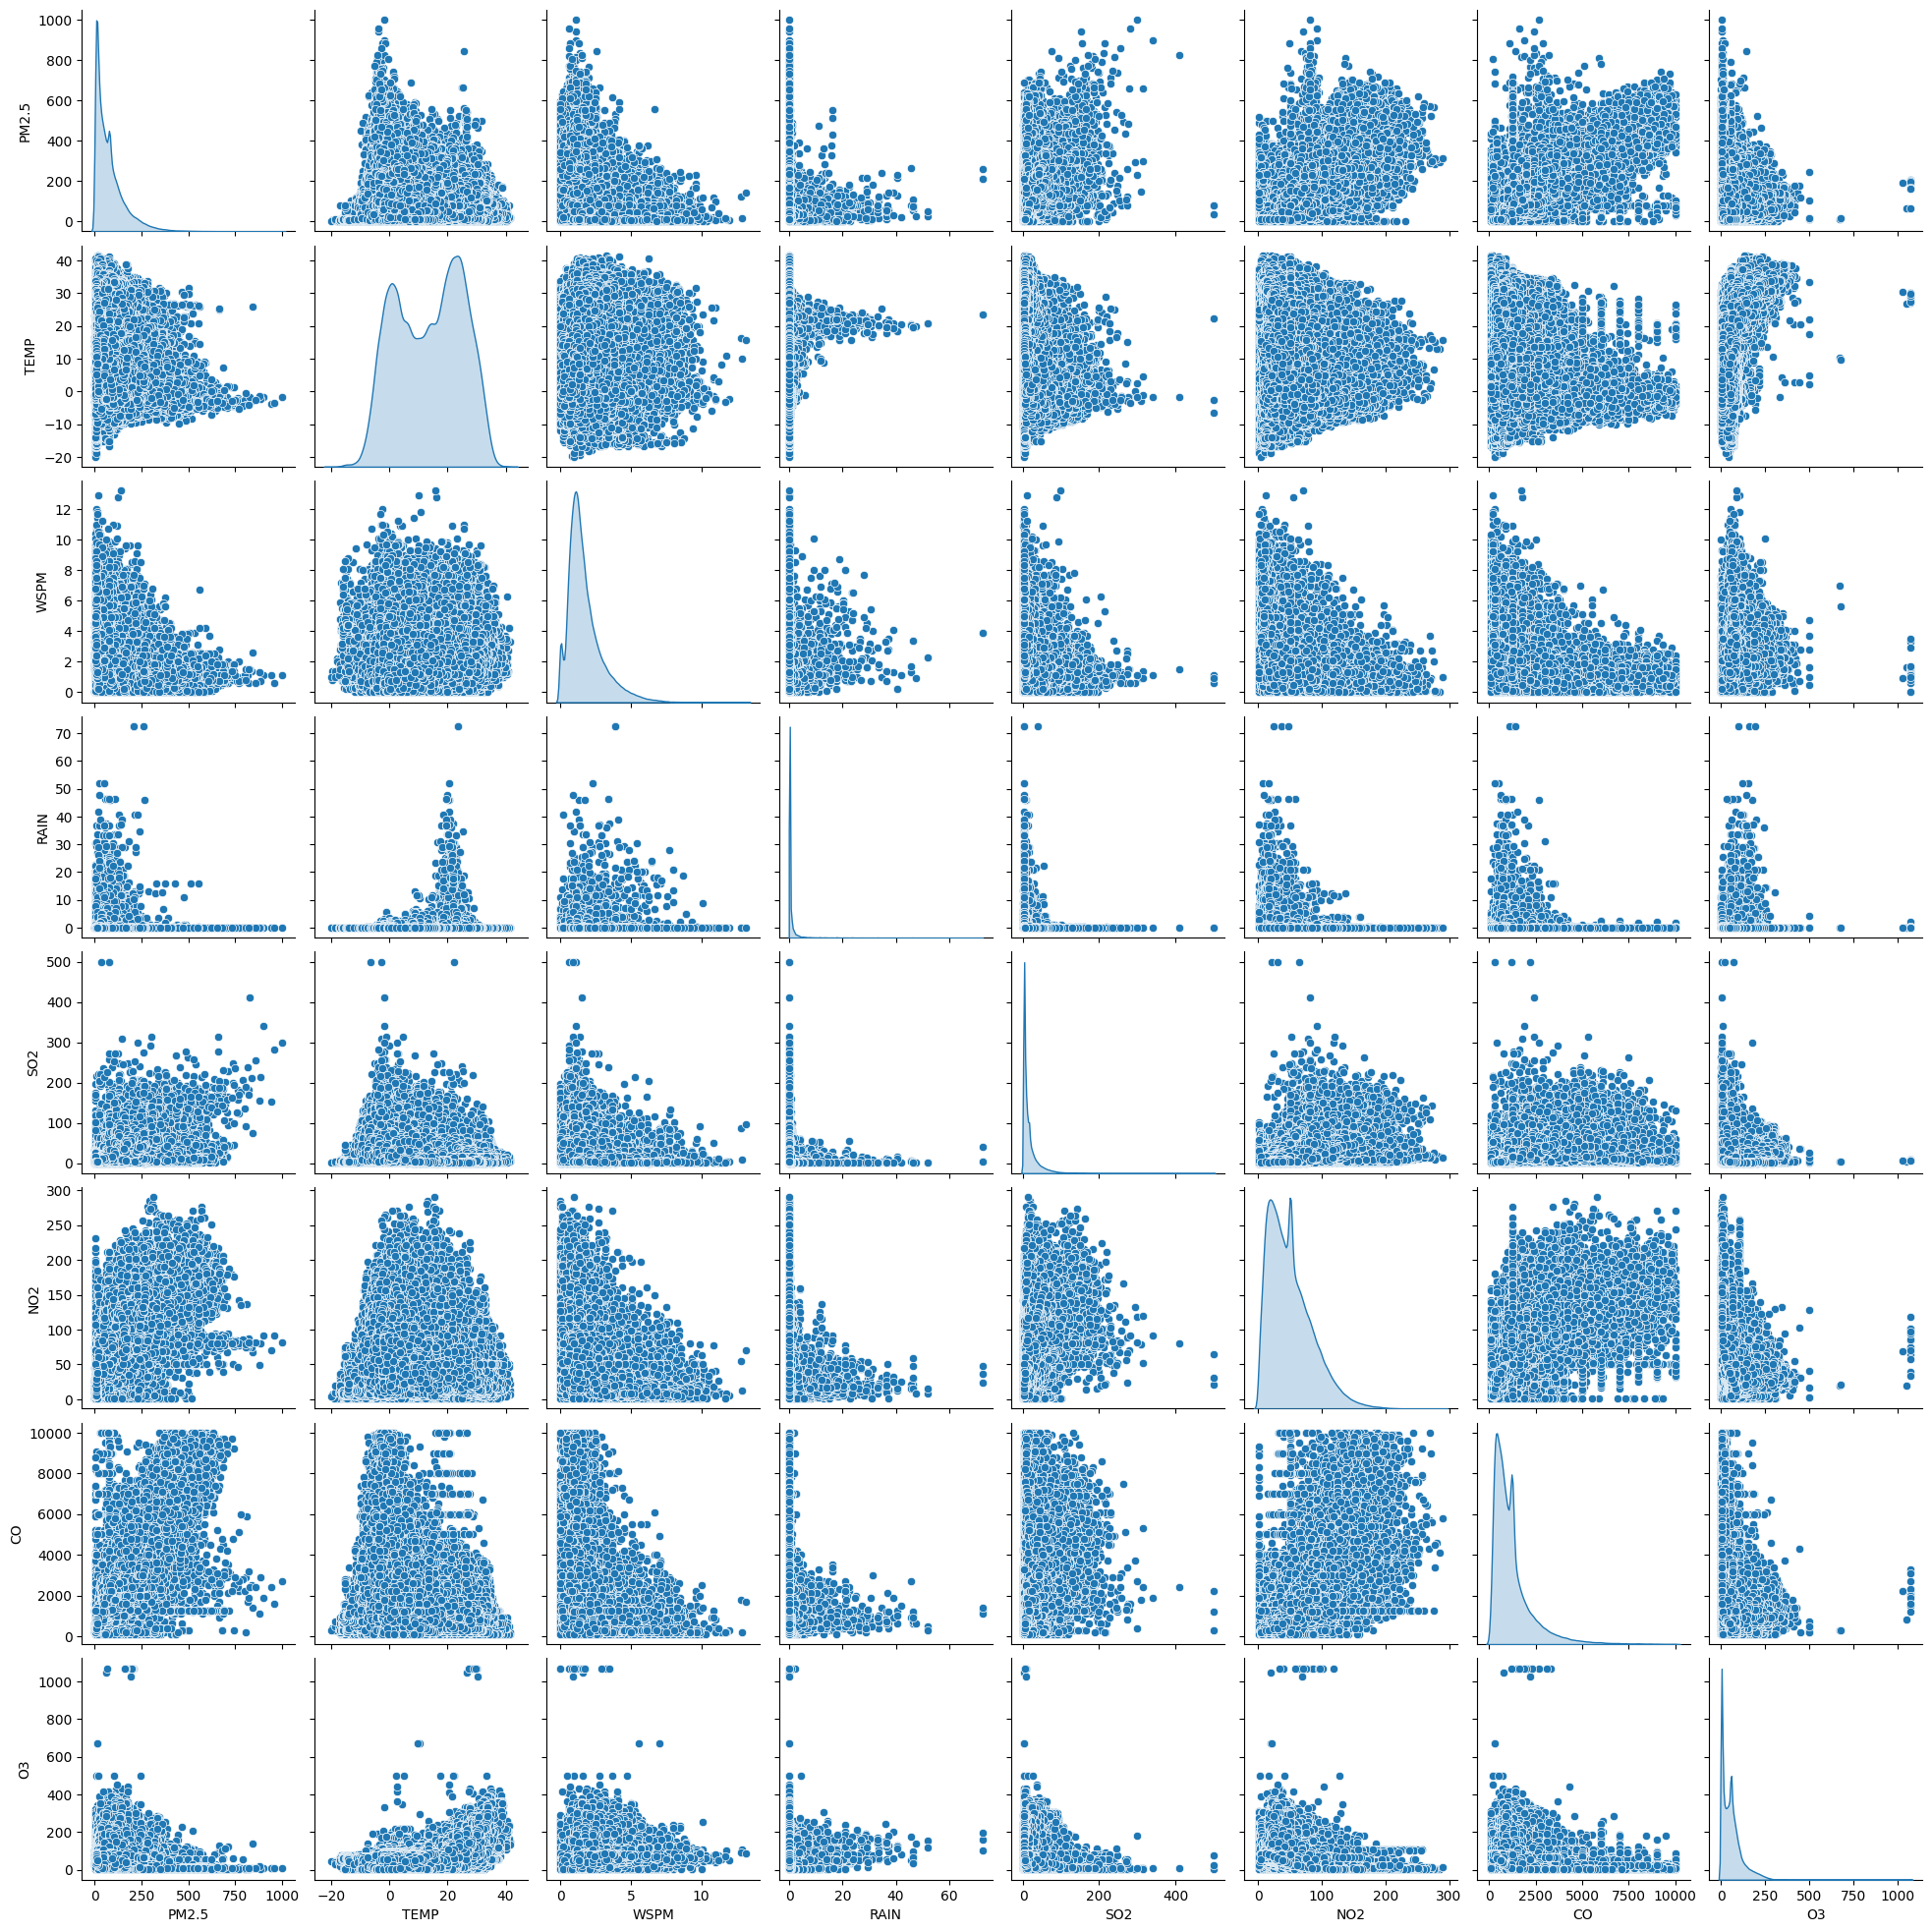

In [120]:
# Pairplot to visualize relationships
sns.pairplot(data[['PM2.5', 'TEMP', 'WSPM', 'RAIN', 'SO2', 'NO2', 'CO', 'O3']], diag_kind='kde')
plt.show()

  **Insight:**
  - Pairplots allow for the examination of pairwise relationships between variables.

 ### Question 4: Which monitoring stations consistently report the poorest air quality, and what recommendations can be made to improve it?

In [126]:
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [141]:
# Calculate average PM2.5 per station
avg_pm25 = data.groupby('station')['PM2.5'].mean().reset_index()
print(avg_pm25)

          station      PM2.5
0    Aotizhongxin  82.694993
1       Changping  71.291647
2        Dingling  66.296172
3          Dongsi  86.057386
4        Guanyuan  82.878210
5         Gucheng  83.777314
6         Huairou  69.902696
7    Nongzhanguan  84.748126
8          Shunyi  79.499461
9         Tiantan  82.119124
10         Wanliu  83.335700
11  Wanshouxigong  84.920309


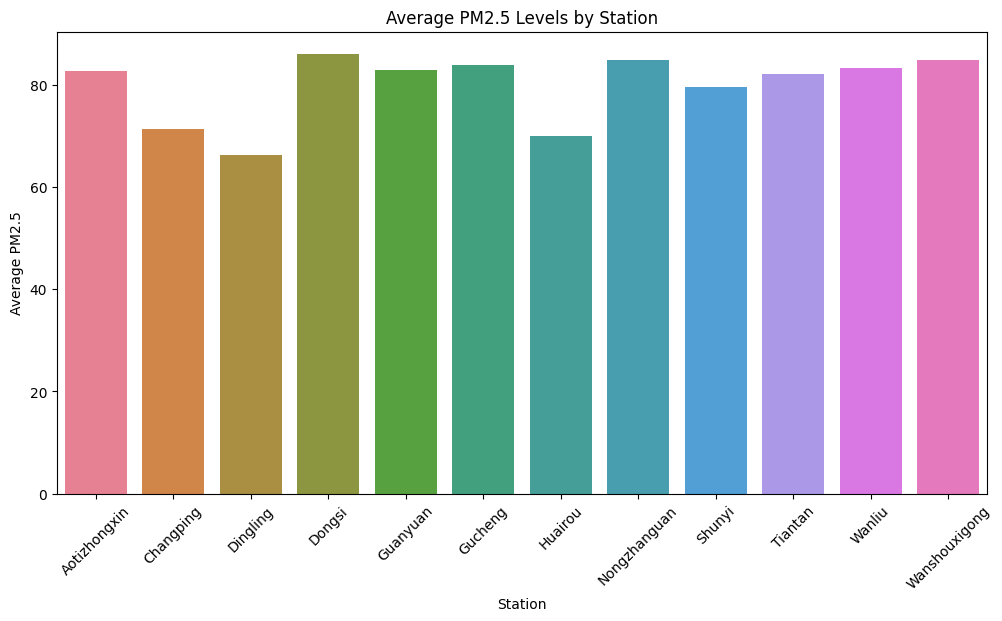

In [140]:
# Calculate average PM2.5 per station
avg_pm25 = data.groupby('station')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='PM2.5', data=avg_pm25, hue='station')  
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.show()

  **Insight:**
  - Bar charts identify which stations have the highest average PM2.5 levels.
  - Stations with consistently high PM2.5 levels may require targeted pollution control measures.

 ## Conclusion

  - **Conclusion for Question 1:** Identified key factors such as PM10, NO2, and CO levels that significantly influence PM2.5 concentrations across monitoring stations.
  - **Conclusion for Question 2:** Observed distinct seasonal patterns with higher PM2.5 levels in winter and significant geographical variations indicating certain stations are more affected.
  - **Conclusion for Question 3:** Established relationships showing that increased wind speed correlates with lower PM2.5 levels, while higher temperatures are associated with increased PM2.5 concentrations, suggesting meteorological conditions play a critical role in air quality.
  - **Conclusion for Question 4:** Determined that stations like *Wanshouxigong* consistently report the highest PM2.5 levels, recommending targeted pollution control measures such as traffic regulation and industrial emissions reduction in those areas.